In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\Medical.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.isnull().sum(axis=0) #check missing

age         0
sex         0
bmi         7
children    0
smoker      0
region      0
charges     6
dtype: int64

In [7]:
 #mengganti missing value dengan mean
data.bmi=data.bmi.fillna(data.bmi.mean())
data.charges=data.charges.fillna(data.charges.mean())
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
495,20,male,27.930000,0,no,northeast,1967.02270
496,31,female,23.600000,2,no,southwest,4931.64700
497,45,male,30.586815,2,no,southwest,8027.96800
498,44,female,23.980000,2,no,southeast,8211.10020


In [8]:
data.describe()

,age,bmi,children,charges
count,500.000000,500.000000,500.000000,500.000000
mean,39.522000,30.586815,1.084000,13333.996709
std,14.622899,5.789922,1.218159,11930.821891
min,18.000000,15.960000,0.000000,1137.011000
25%,26.000000,26.600000,0.000000,4747.869550
50%,40.000000,30.495000,1.000000,9639.395250
75%,53.000000,34.400000,2.000000,17082.126900
max,64.000000,49.060000,5.000000,51194.559140


In [9]:
#mentransformasikan data kategorik menjadi numberik untuk menghitung korelasi
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

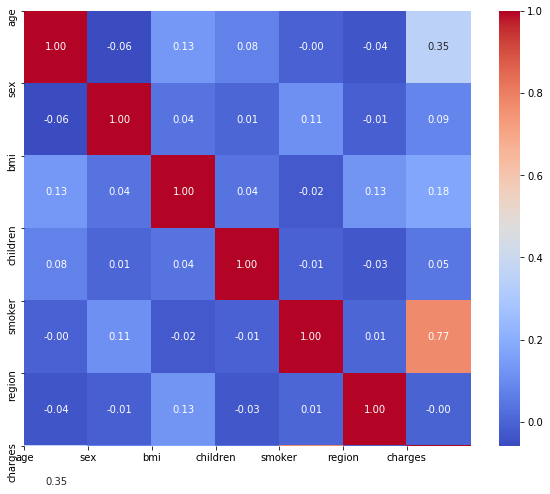

In [10]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

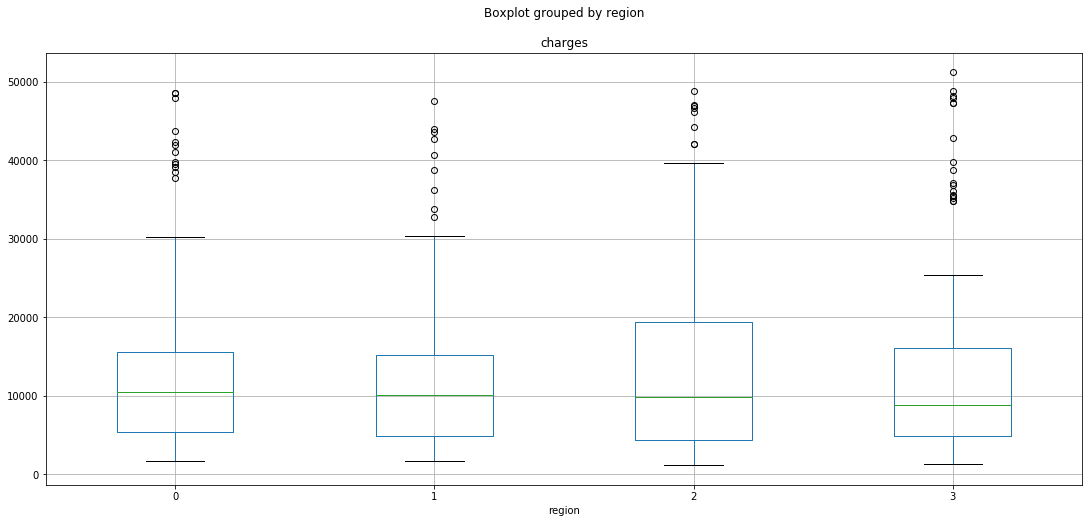

In [11]:
data.boxplot(column="charges",by="region", figsize=(18, 8))

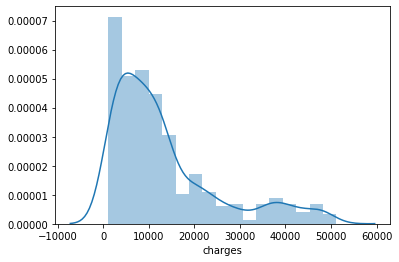

In [12]:
sns.distplot(data.charges)

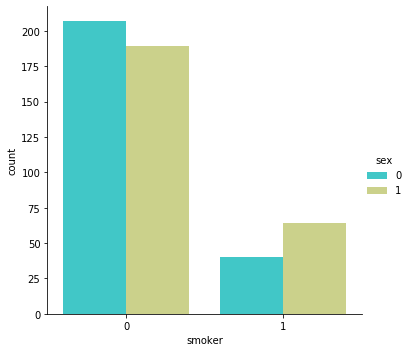

In [13]:
sns.catplot(x="smoker",kind="count",hue='sex',palette="rainbow",data=data)

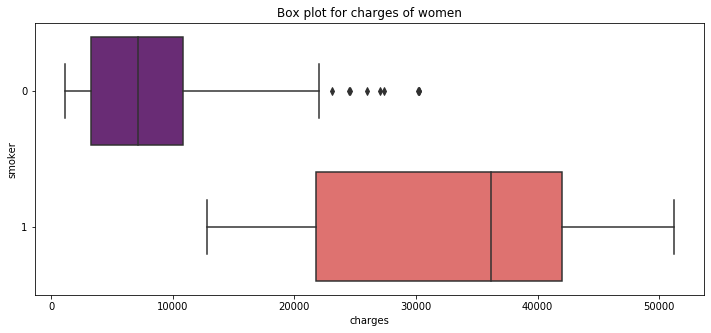

In [14]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

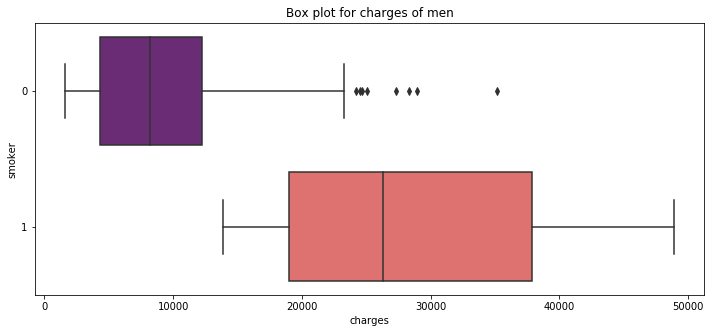

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'magma')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

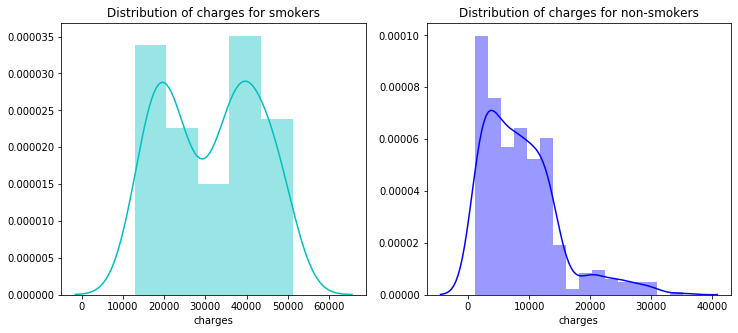

In [16]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

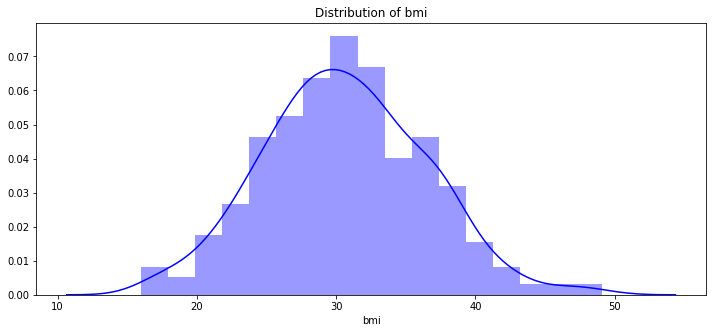

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

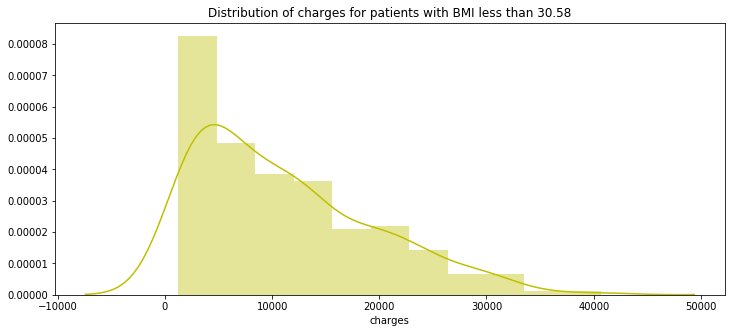

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30.58")
ax = sns.distplot(data[(data.bmi < 30.58)]['charges'], color = 'y')

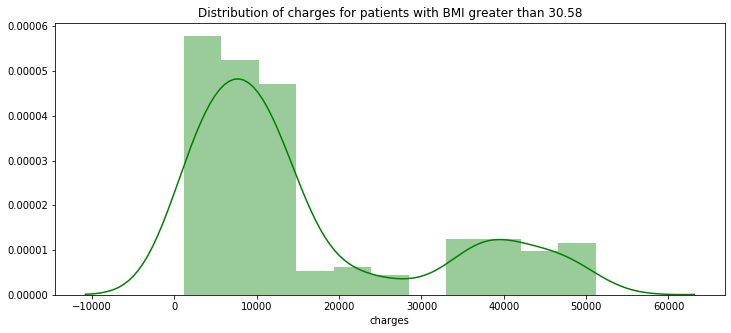

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30.58")
ax = sns.distplot(data[(data.bmi >= 30.58)]['charges'], color = 'g')

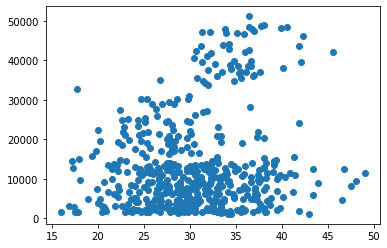

In [20]:
plt.scatter(data.bmi, data.charges)

C:\Users\M.Adlansyah\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


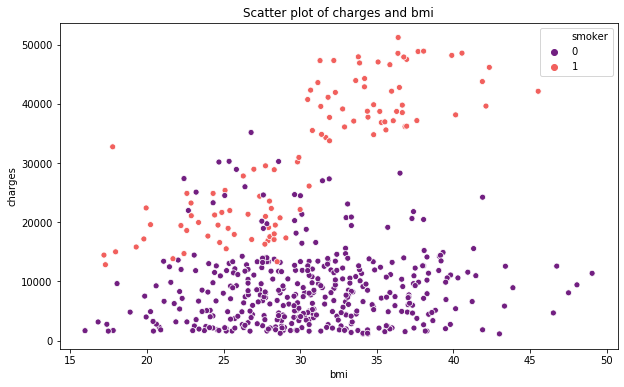

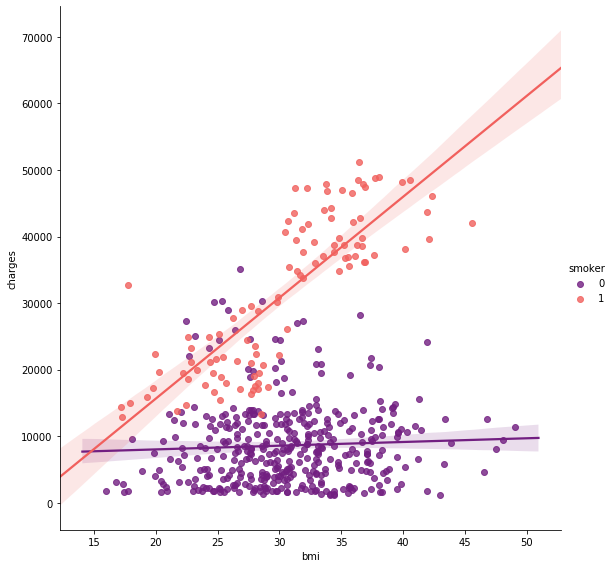

In [21]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Text(0.5, 1.0, 'Box plot of Charges vs Children')

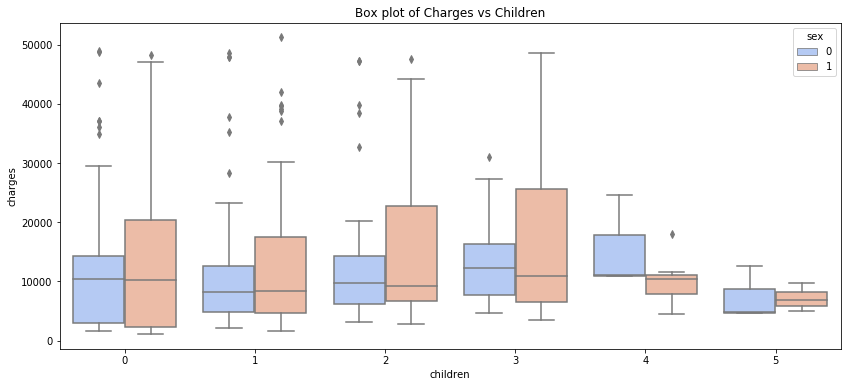

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=data,palette='coolwarm')
plt.title('Box plot of Charges vs Children')

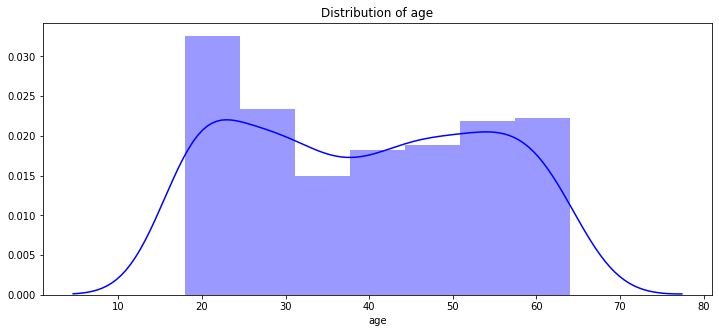

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'b')

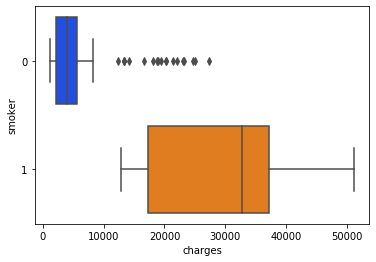

In [24]:
sns.boxplot(y="smoker", x="charges", data = data[(data.age <= 40)] , orient="h", palette = 'bright')

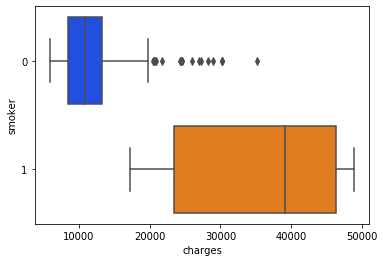

In [25]:
sns.boxplot(y="smoker", x="charges", data = data[(data.age >= 40)] , orient="h", palette = 'bright')

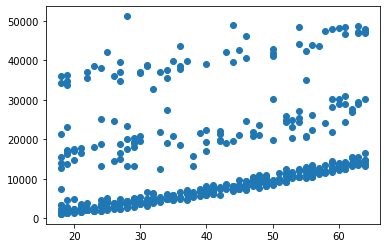

In [26]:
plt.scatter(data.age, data.charges)

C:\Users\M.Adlansyah\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Smokers and non-smokers')

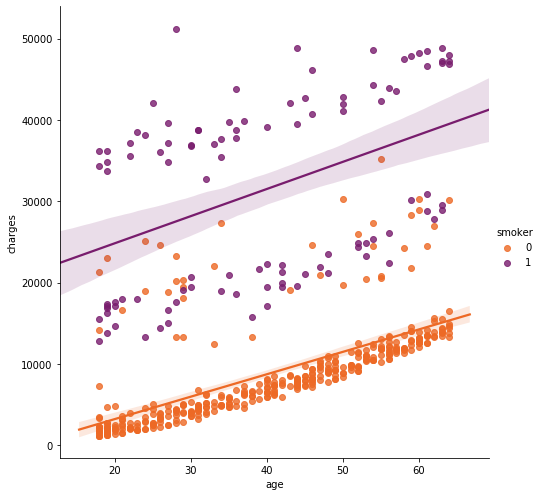

In [27]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')